In [1]:
import tensorflow as tf
import keras as k
import tifffile
import gdal
import os
import numpy as np
from PIL import Image
from tifffile import imsave
import numpy as np
import cv2

Using TensorFlow backend.


In [15]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
fn=gdal.Open(r'C:\Users\rrkot\Desktop\T33_mod_Cnv\T3\T33_mod.bin.bin')
fn_array=fn.ReadAsArray()
imsave('T33mod.tif',fn_array)

In [8]:
fn_array.astype(np.uint16)

array([[ 9473,  8960,  8952, ..., 11960, 16146, 12617],
       [ 9258,  7438,  7437, ..., 14140, 17572, 12490],
       [ 9181,  7313,  7424, ..., 14759, 17856, 13360],
       ...,
       [ 9010,  7383,  7416, ..., 14015, 12861, 12312],
       [ 8992,  7442,  7376, ..., 11990,  9738, 10330],
       [ 9424,  9443,  9287, ..., 11856, 10288,  8121]], dtype=uint16)

In [18]:
def inflate_my_image():
    dir_path=r'D:\Semantic\Unet\Open THis\unet SUkri\data\train\image'
    num_images=len(os.listdir(dir_path))
    print(num_images)
    for i in range(1,num_images+1):
        pic_array=tifffile.imread(dir_path+'{}.tif'.format(i))
        
        
inflate_my_image()

270


In [49]:
r=r'D:\GeoSpatial\Data\Mumbai\T3\Tiff\Mumbai'
q=tifffile.imread(r+'\T{}.tif'.format(11))
qbar=np.shape(q)
print(qbar)
w=q[:,:,np.newaxis]
print(np.shape(w))
#wbar=np.concatenate(q,np.zeros((512,512,1)),axis=2)
wbar=np.dstack((w,w))
wbar=np.dstack((wbar,w))
print(np.shape(wbar))
u=tifffile.imsave('trial.tif',wbar)

(2260, 1328)
(2260, 1328, 1)
(2260, 1328, 3)


In [41]:
wbar,q

(array([[[0.03142229, 0.03142229, 0.03142229],
         [0.04544418, 0.04544418, 0.04544418],
         [0.04613599, 0.04613599, 0.04613599],
         ...,
         [0.03820745, 0.03820745, 0.03820745],
         [0.03373365, 0.03373365, 0.03373365],
         [0.03244915, 0.03244915, 0.03244915]],
 
        [[0.03771712, 0.03771712, 0.03771712],
         [0.07845586, 0.07845586, 0.07845586],
         [0.07499295, 0.07499295, 0.07499295],
         ...,
         [0.07096207, 0.07096207, 0.07096207],
         [0.06255542, 0.06255542, 0.06255542],
         [0.06255542, 0.06255542, 0.06255542]],
 
        [[0.03993776, 0.03993776, 0.03993776],
         [0.07899097, 0.07899097, 0.07899097],
         [0.07810053, 0.07810053, 0.07810053],
         ...,
         [0.05293619, 0.05293619, 0.05293619],
         [0.05034767, 0.05034767, 0.05034767],
         [0.05523838, 0.05523838, 0.05523838]],
 
        ...,
 
        [[0.04690054, 0.04690054, 0.04690054],
         [0.08812839, 0.08812839, 0.08812

In [90]:
def ch(img):
    return np.dsplit(img,img.shape[-1])
[a,b,c]=ch(q)


In [101]:
for l in range (1,16):
    wbar=tifffile.imread('{}.tif'.format(l))
    np.shape(wbar)
    q=wbar.transpose(0,1,2)
    [a,b,c]=ch(q)
    tifffile.imsave("{}.tif".format(l),a)

In [91]:
tifffile.imsave('1.tif',a)
#tifffile.imsave('2.tif',d)
#tifffile.imsave('3.tif',g)
#tifffile.imsave('4.tif',k)

In [48]:
comp1=b==g
comp2=b==r
comp3=g==r
eq1=comp1.all()
eq2=comp2.all()
eq3=comp3.all()
print(eq1)
print(eq2)
print(eq3)

True
True
True


In [2]:
def load_image(name):
    img=tifffile.imread(name)
    #img=cv2.imread(name)
    #imgo=img.asarray(img)
    imgi=Image.fromarray(img)
   
    return imgi

In [3]:
def crop_img(imag,Partition_no):
    for num in range(Partition_no):          #My image was of dimension 1328x2260
        
        if (num==1):
            cropped=imag.crop((0,0,512,512)) #Enter Pixel range.(topleft,upper,bottomright,lower)
            convert_array=np.array(cropped)
            imsave('1.tif',convert_array)
            print("First done")
        elif (num==3):
            cropped=imag.crop((816,0,1328,512))
            convert_array=np.array(cropped)
            imsave('2.tif',convert_array)
            print("Third done")
        elif (num==2):
            cropped=imag.crop((513,0,1025,512))
            convert_array=np.array(cropped)
            imsave('3.tif',convert_array)
            print("Second done")
        elif (num==4):
            cropped=imag.crop((0,512,512,1024))
            convert_array=np.array(cropped)
            imsave('4.tif',convert_array)
            print("Fourth done")
        elif(num==5):
            cropped=imag.crop((513,512,1025,1024))
            convert_array=np.array(cropped)
            imsave('5.tif',convert_array)
            print("Fifth done")
        elif (num==6):
            cropped=imag.crop((816,512,1328,1024))
            convert_array=np.array(cropped)
            imsave('6.tif',convert_array)
            print("Sixth done")
        elif (num==7):
            cropped=imag.crop((0,1024,512,1536))
            convert_array=np.array(cropped)
            imsave('7.tif',convert_array)
            print("Seventh done")
        elif (num==8):
            cropped=imag.crop((513,1024,1025,1536))
            convert_array=np.array(cropped)
            imsave('8.tif',convert_array)
            print("Eighth done")
        elif (num==9):
            cropped=imag.crop((816,1024,1328,1536))
            convert_array=np.array(cropped)
            imsave('9.tif',convert_array)
            print('Ninth done')
        elif(num==10):
            cropped=imag.crop((0,1536,512,2048))
            convert_array=np.array(cropped)
            imsave('10.tif',convert_array)
            print('Tenth done')
        elif(num==11):
            cropped=imag.crop((513,1536,1025,2048))
            convert_array=np.array(cropped)
            imsave('11.tif',convert_array)
            print("Eleventh done")
        elif(num==12):
            cropped=imag.crop((816,1536,1328,2048))
            convert_array=np.array(cropped)
            imsave('12.tif',convert_array)
            print("Twelth done")
        elif(num==13):
            cropped=imag.crop((0,1748,512,2260))
            convert_array=np.array(cropped)
            imsave('13.tif',convert_array)
            print("Thirteenth done")
        elif(num==14):
            cropped=imag.crop((513,1748,1025,2260))
            convert_array=np.array(cropped)
            imsave('14.tif',convert_array)
            print("Fourteenth done")
        elif(num==15):
            cropped=imag.crop((816,1748,1328,2260))
            convert_array=np.array(cropped)
            imsave('15.tif',convert_array)
            print("Fifteenth done")
        else:
            print("Starting up engine")

    return print("Success")

In [26]:
test= load_image(r'D:\Dataset\GeoSpatial\Data\Mumbai\UINT16R\T33.tif')
print(np.shape(test))
test
Partition_no=16  

(2260, 1328)


In [27]:
crop_img(test,Partition_no)

Starting up engine
First done
Second done
Third done
Fourth done
Fifth done
Sixth done
Seventh done
Eighth done
Ninth done
Tenth done
Eleventh done
Twelth done
Thirteenth done
Fourteenth done
Fifteenth done
Success


In [38]:
puta=tifffile.imread(r'D:\Dataset\GeoSpatial\Data\Mumbai\T3\Tiff\Mumbai\Mumbai.tif')
np.shape(puta)

(9, 2260, 1328)

In [25]:
puta



array([[0.00369877, 0.00360754, 0.00382666, ..., 0.04737408, 0.04976995,
        0.04841785],
       [0.00452759, 0.00773904, 0.00788792, ..., 0.09341532, 0.11644132,
        0.06513959],
       [0.00452347, 0.00830301, 0.00773714, ..., 0.11094887, 0.12427004,
        0.06086783],
       ...,
       [0.00433374, 0.0084161 , 0.008103  , ..., 0.05622543, 0.05882409,
        0.03152891],
       [0.00429615, 0.00830512, 0.00828467, ..., 0.05616434, 0.05778513,
        0.03504248],
       [0.0040924 , 0.00487128, 0.00471039, ..., 0.03181709, 0.03906632,
        0.03720917]], dtype=float32)

In [26]:
from PIL import Image

# Make an 8-bit version for display
(Image.fromarray((puta*200).astype(np.float32)).show())

In [2]:
for z in range(1,16):    
    a=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T11\{}.tif'.format(z))
    b=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T12mod\{}.tif'.format(z))
    c=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T13mod\{}.tif'.format(z))
    d=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T22\{}.tif'.format(z))
    e=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T23mod\{}.tif'.format(z))
    f=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T22\{}.tif'.format(z))
    g=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T23mod\{}.tif'.format(z))
    h=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T33\{}.tif'.format(z))
    #i=tifffile.imread(r'D:\miniconda\envs\tensorflow\Notebook\T33\{}.tif'.format(z))
    #w=q[:,:,np.newaxis]
    #t=qbar[:,:,np.newaxis]
    wbar=np.dstack((a,b))
    wbar=np.dstack((wbar,c))
    wbar=np.dstack((wbar,d))
    wbar=np.dstack((wbar,e))
    wbar=np.dstack((wbar,f))
    wbar=np.dstack((wbar,g))
    wbar=np.dstack((wbar,h))
    #wbar=np.dstack((wbar,i))
    #wbar=np.dstack((wbar,w))
    o=wbar.transpose([2,0,1])
    print(np.shape(o))
    u=tifffile.imsave('{}.tif'.format(z),o)


(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)
(8, 512, 512)


In [2]:
x=tifffile.imread(r'D:\Dataset\GeoSpatial\Data\Mumbai\T3\Tiff\Labels\image.tif')
np.shape(x)

ValueError: not a TIFF file

In [23]:
def flip_image(image_path, saved_location):
    """
    Flip or mirror the image
    @param image_path: The path to the image to edit
    @param saved_location: Path to save the cropped image
    """
    image_obj = Image.open(image_path)
    rotated_image = image_obj.transpose(Image.FLIP_LEFT_RIGHT)
    rotated_image=rotated_image.rotate(180)
    #print(type(rotated_image))
    rotated_image.save(saved_location)
    #rotated_image.show()


In [38]:
image = (r'D:\miniconda\envs\tensorflow\Notebook\UINT16\T33mod.tif')
flip_image(image, 'T33mod.tif')

<class 'PIL.Image.Image'>


In [13]:
ci=Image.open(r'D:\Dataset\GeoSpatial\Data\Mumbai\T3\PauliRGB.bmp')
rc=ci.transpose(Image.FLIP_LEFT_RIGHT)
rc.show()
rc.save('PauliRGB.jpg')

In [13]:
img1=tifffile.imread(r'D:\Dataset\GeoSpatial\Data\Mumbai\T3\Tiff\Mumbai\Stacked\Mumbai.tif')
img2=tifffile.imread(r'D:\Dataset\Traintestsplit\train\label\13.tif')
img3=tifffile.imread(r'C:\Users\rrkot\Desktop\test1.tif')


In [14]:
img3=img3.transpose(2,1,0)

In [15]:
np.shape(img2),np.shape(img3)

((512, 512, 3), (512, 512, 3))

In [16]:
img2,img3

(array([[[ 63,  72, 204],
         [ 63,  72, 204],
         [ 63,  72, 204],
         ...,
         [255, 127,  39],
         [255, 127,  39],
         [255, 127,  39]],
 
        [[ 63,  72, 204],
         [ 63,  72, 204],
         [ 63,  72, 204],
         ...,
         [255, 127,  39],
         [255, 127,  39],
         [255, 127,  39]],
 
        [[ 63,  72, 204],
         [ 63,  72, 204],
         [ 63,  72, 204],
         ...,
         [255, 127,  39],
         [255, 127,  39],
         [255, 127,  39]],
 
        ...,
 
        [[ 63,  72, 204],
         [ 63,  72, 204],
         [ 63,  72, 204],
         ...,
         [236,  28,  36],
         [236,  28,  36],
         [236,  28,  36]],
 
        [[ 63,  72, 204],
         [ 63,  72, 204],
         [ 63,  72, 204],
         ...,
         [236,  28,  36],
         [236,  28,  36],
         [236,  28,  36]],
 
        [[ 63,  72, 204],
         [ 63,  72, 204],
         [ 63,  72, 204],
         ...,
         [236,  28,  36],
  

In [9]:
np.savetxt("truth.csv", img2, delimiter=",")
np.savetxt("pred.csv", img3, delimiter=",")

ValueError: Expected 1D or 2D array, got 3D array instead

In [18]:
import sklearn

In [23]:
from sklearn.metrics import multilabel_confusion_matrix

In [24]:
multilabel_confusion_matrix(img2,img3)

ValueError: unknown is not supported

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
img1=tifffile.imread(r'D:\Dataset\GeoSpatial\Data\Mumbai\UINT16R\T23img.tif')
img2=tifffile.imread(r'D:\Dataset\GeoSpatial\Data\Mumbai\T3\Tiff\Mumbai\Stacked\Mumbai.tif')

In [45]:
img1

array([[30979, 31072, 31032, ..., 29664, 26358, 18986],
       [30955, 30903, 30603, ..., 22527, 32113, 37515],
       [30965, 30705, 30655, ..., 24779, 38325, 37238],
       ...,
       [30412, 30432, 30634, ..., 28881, 34245, 32254],
       [30370, 30271, 30629, ..., 37168, 31421, 25657],
       [30451, 30627, 30608, ..., 38618, 38264, 21966]], dtype=uint16)

In [46]:
np.amax(img1)

65535

In [7]:
img1.min()

7

In [49]:
np.amin(img2)

-131.65527

In [50]:
np.amax(img2)

2144.0564

ValueError: x must have 2 or fewer dimensions

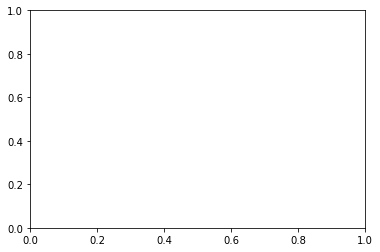

In [10]:
plt.hist(img1,bins='auto')
